# HOMEWORK 3

For this homework you are going to implement the **unsharp masking** filter (USM). It is a technique to improve the sharpness of an image by combining the image with its blurred (unsharp) version. See the Wikipedia [page](https://en.wikipedia.org/wiki/Unsharp_masking) for more details.

### Unsharp Masking (USP)
The USM technique consists of the following steps:
* Load the image you will be working with.
* Create a blurred (unsharp) version of the original image.
* Add the unsharp image (with a certain **weight**) to the original.

To sum it up, the USM performs the following operation:

`sharpened = original + (original − unsharp) × amount`

Even though we provide you an image to work with, you are welcome to use your own images :-)

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

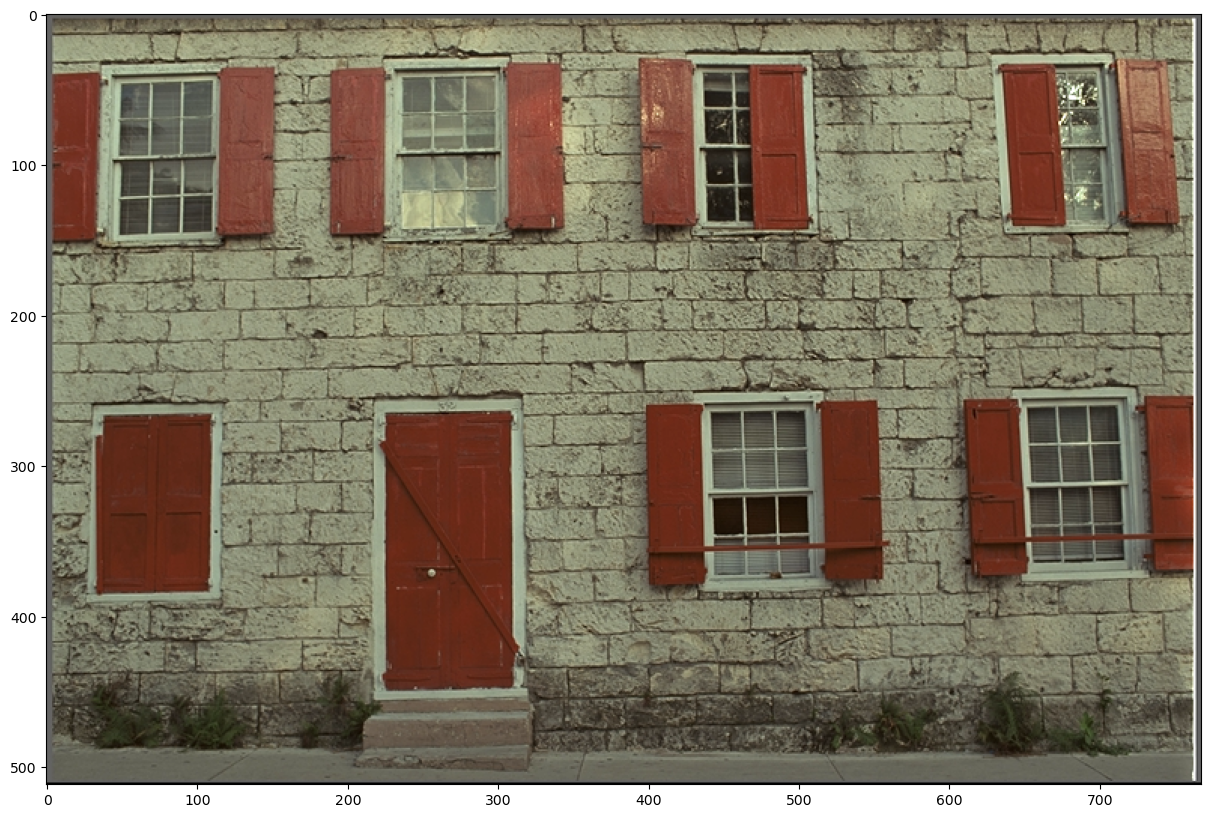

In [12]:
img = cv2.imread('../data/kodim01.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)/255.0
plt.imshow(img)

float64


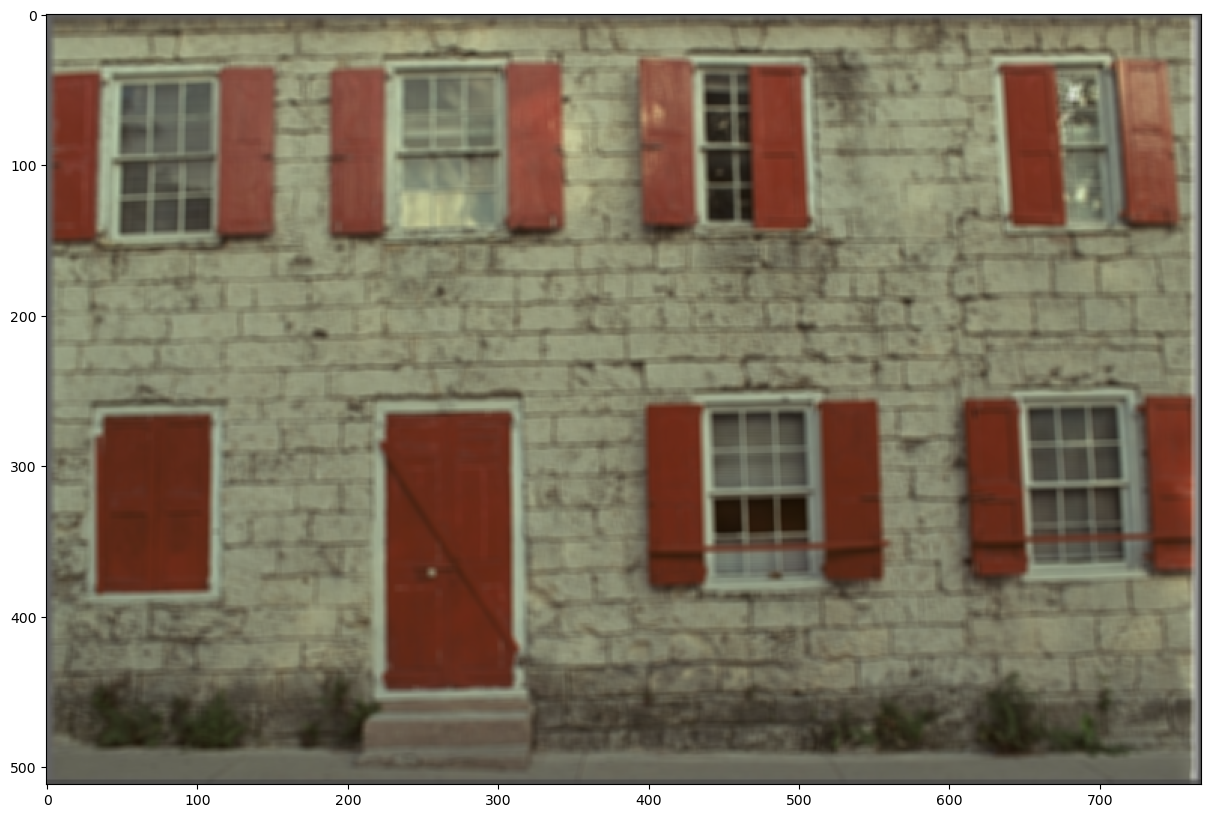

In [13]:
# Create a blurred (unsharp) version of the original image (you can use Gaussian blurring)
unsharp = cv2.GaussianBlur(img, ksize=(5, 5), sigmaX=10)
plt.imshow(unsharp)
print(unsharp.dtype)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4660508796791797..0.6386701406099989].


float64 -0.4660508796791797 0.6386701406099989


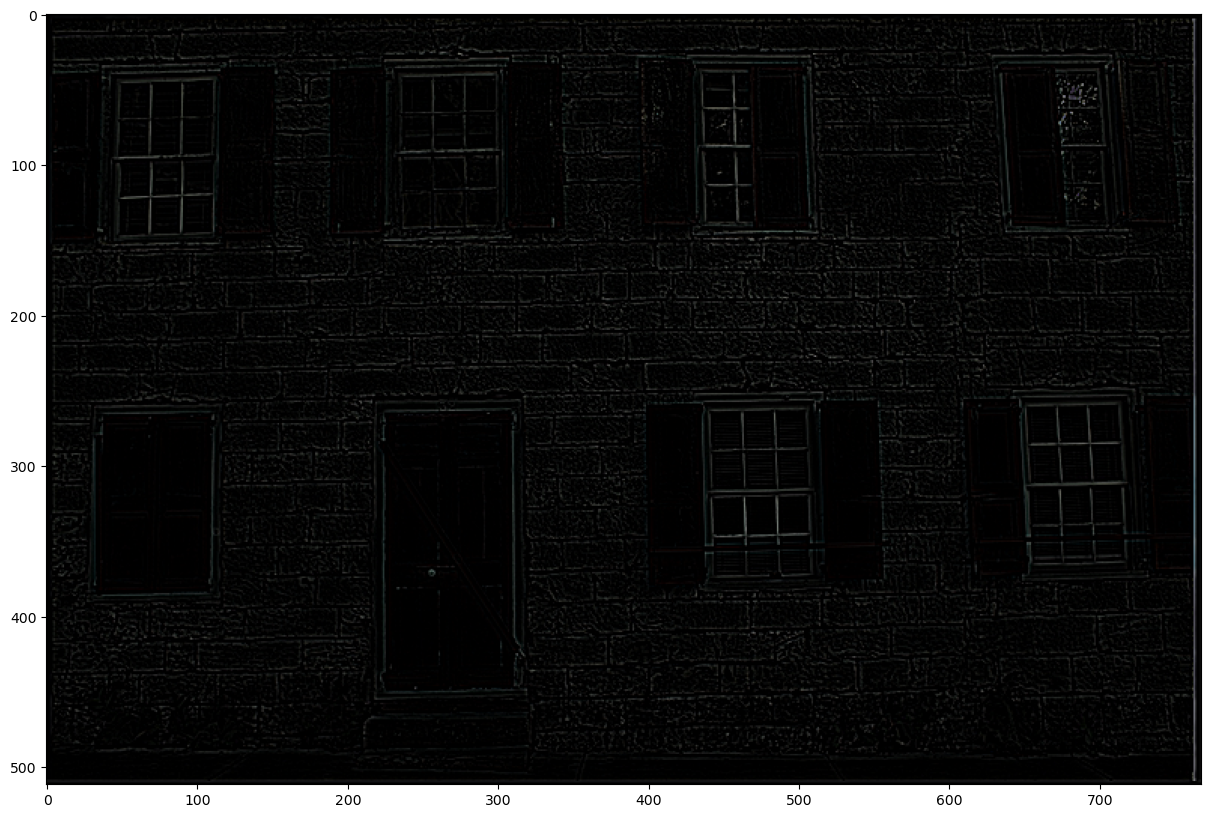

In [15]:
# Create the difference image (original − unsharp)
# Note: Remember that you are working with uint8 data types. Any addition or substractions
# might result in overflow or underflow, respectively. You can prevent this by casting the images to float.
diff = img - unsharp
plt.imshow(diff)
print(diff.dtype, diff.min(), diff.max())

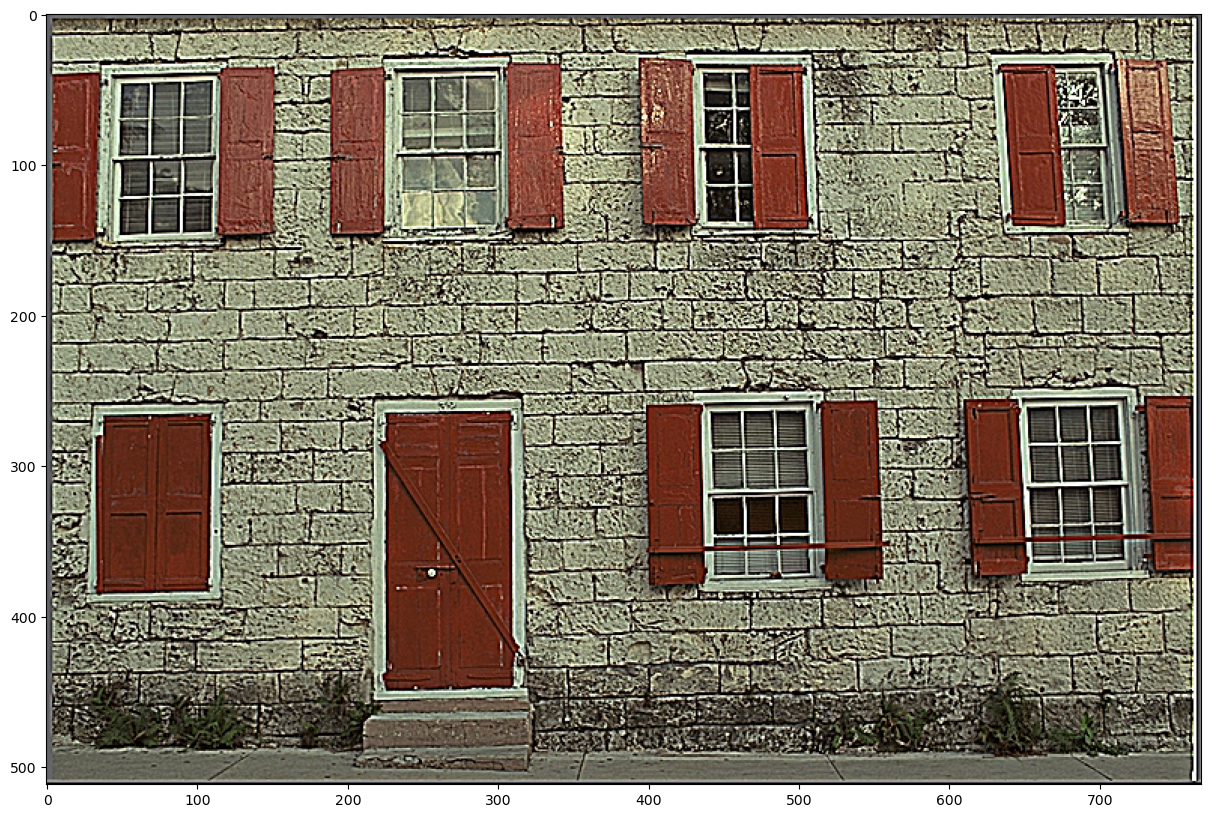

In [23]:
# Apply USM to get the resulting image using `sharpened = original + (original − unsharp) × amount`
# Note: Again, take care of underflows/overflows if necessary.
amount = 3
sharpened = img + diff * amount
sharpened = np.clip(sharpened, 0, 1)
plt.imshow(sharpened)

### Questions
* What is a good (reasonable) value for the `amount` parameter? - 0.5 - відчувається посилення різкості але не забагато
 * What happens if it is too small? - майже немає різниці, кордони лишаються розмитими
 * What happens if it is too large? - при великому значенні занадто різке зображення, ефект штучності, ніби намалйоване